In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = "/content/drive/MyDrive/Datasettt/training"
valid_dir = "/content/drive/MyDrive/Datasettt/validation"
test_dir = "/content/drive/MyDrive/Datasettt/testing"

In [ ]:
# Ensure the directories exist
assert os.path.isdir(train_dir), f"Training directory not found: {train_dir}"
assert os.path.isdir(valid_dir), f"Validation directory not found: {valid_dir}"
assert os.path.isdir(test_dir), f"Test directory not found: {test_dir}"

In [ ]:

train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input)
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input)

train_batches = train_datagen.flow_from_directory(train_dir, target_size=(299, 299), batch_size=50, class_mode='categorical')
valid_batches = valid_datagen.flow_from_directory(valid_dir, target_size=(299, 299), batch_size=50, class_mode='categorical')
test_batches = test_datagen.flow_from_directory(test_dir, target_size=(299, 299), batch_size=50, class_mode='categorical', shuffle=False)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [ ]:
# Retrieve One Batch of Images and Labels¶
imgs, labels = next(train_batches)


In [ ]:
#load pretrained model
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model.summary()
print(type(base_model))

219055592/219055592 [==============================] - 8s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (

In [ ]:
#build the model
model = models.Model(inputs=base_model.input, outputs=base_model.output)
model.trainable = False

# Add GlobalAveragePooling2D and Dense layer for classification
x = layers.GlobalAveragePooling2D()(model.output)
x = layers.Dense(4, activation='softmax')(x)

# Final model
final_model = models.Model(inputs=model.input, outputs=x)

In [ ]:
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.05 and logs.get('val_accuracy') > 0.90):
      print("\Stopped, Akurasi mencapai 98%")
      self.model.stop_training = True;
callbacks= myCallback()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
# Tentukan path penyimpanan model
checkpoint_path = '/content/drive/MyDrive/Datasettt/Resnet.h5'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=1)  # Menampilkan pesan saat menyimpan

In [ ]:
import math
# Train model
history = final_model.fit(train_batches,
                          validation_data=valid_batches,
                          steps_per_epoch=math.ceil(train_batches.n / 50),
                          validation_steps=math.ceil(valid_batches.n / 50),
                          epochs=100,
                          verbose=1,
                          callbacks=([callbacks],[checkpoint_callback]))

import pickle
# Simpan history pelatihan
history_path = '/content/drive/MyDrive/Datasettt/history.pkl'
with open(history_path, 'wb') as f:
    pickle.dump(history.history, f)

print("Model dan history pelatihan telah disimpan.")


Epoch 1/100
64/64 [==============================] - ETA: 0s - loss: 1.1543 - accuracy: 0.4616 
Epoch 1: val_loss improved from inf to 1.03480, saving model to /content/drive/MyDrive/Datasettt/Resnet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


64/64 [==============================] - 2022s 31s/step - loss: 1.1543 - accuracy: 0.4616 - val_loss: 1.0348 - val_accuracy: 0.5487
Epoch 2/100
64/64 [==============================] - ETA: 0s - loss: 1.0006 - accuracy: 0.5453
Epoch 2: val_loss improved from 1.03480 to 0.93492, saving model to /content/drive/MyDrive/Datasettt/Resnet.h5
64/64 [==============================] - 584s 9s/step - loss: 1.0006 - accuracy: 0.5453 - val_loss: 0.9349 - val_accuracy: 0.5813
Epoch 3/100
64/64 [==============================] - ETA: 0s - loss: 0.9057 - accuracy: 0.6000
Epoch 3: val_loss improved from 0.93492 to 0.89818, saving model to /content/drive/MyDrive/Datasettt/Resnet.h5
64/64 [==============================] - 550s 9s/step - loss: 0.9057 - accuracy: 0.6000 - val_loss: 0.8982 - val_accuracy: 0.6012
Epoch 4/100
64/64 [==============================] - ETA: 0s - loss: 0.8626 - accuracy: 0.6144
Epoch 4: val_loss improved from 0.89818 to 0.87152, saving model to /content/drive/MyDrive/Datasettt/

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.05 and logs.get('val_accuracy') > 0.90):
      print("\Stopped, Akurasi mencapai 98%")
      self.model.stop_training = True;
callbacks= myCallback()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
# Tentukan path penyimpanan model
checkpoint_path = '/content/drive/MyDrive/Datasettt/Resnet.h5'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=1)  # Menampilkan pesan saat menyimpan

In [ ]:
# Define your callback
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.90:
            print('\nReached 90% accuracy. Stopping training.')
            self.model.stop_training = True

# Instantiate the callback
callbacks = MyCallback()

In [ ]:
model = load_model(checkpoint_path)

callbacks= MyCallback()
model.fit(train_batches,
          validation_data=valid_batches,
          epochs=100,
          callbacks=([callbacks],[checkpoint_callback]))

Epoch 1/100
64/64 [==============================] - ETA: 0s - loss: 0.5519 - accuracy: 0.7784 
Epoch 1: val_loss improved from inf to 0.68105, saving model to /content/drive/MyDrive/Datasettt/Resnet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


64/64 [==============================] - 2395s 37s/step - loss: 0.5519 - accuracy: 0.7784 - val_loss: 0.6811 - val_accuracy: 0.7050
Epoch 2/100
64/64 [==============================] - ETA: 0s - loss: 0.5541 - accuracy: 0.7688 
Epoch 2: val_loss did not improve from 0.68105
64/64 [==============================] - 2375s 37s/step - loss: 0.5541 - accuracy: 0.7688 - val_loss: 0.6814 - val_accuracy: 0.6950
Epoch 3/100
64/64 [==============================] - ETA: 0s - loss: 0.5349 - accuracy: 0.7919 
Epoch 3: val_loss did not improve from 0.68105
64/64 [==============================] - 2376s 37s/step - loss: 0.5349 - accuracy: 0.7919 - val_loss: 0.6826 - val_accuracy: 0.6963
Epoch 4/100
64/64 [==============================] - ETA: 0s - loss: 0.5304 - accuracy: 0.7972 
Epoch 4: val_loss did not improve from 0.68105
64/64 [==============================] - 2314s 36s/step - loss: 0.5304 - accuracy: 0.7972 - val_loss: 0.6824 - val_accuracy: 0.7013
Epoch 5/100
64/64 [========================

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.05 and logs.get('val_accuracy') > 0.90):
      print("\Stopped, Akurasi mencapai 98%")
      self.model.stop_training = True;
callbacks= myCallback()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
# Tentukan path penyimpanan model
checkpoint_path = '/content/drive/MyDrive/Datasettt/Resnet.h5'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=1)  # Menampilkan pesan saat menyimpan

In [ ]:
# Define your callback
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.90:
            print('\nReached 90% accuracy. Stopping training.')
            self.model.stop_training = True

# Instantiate the callback
callbacks = MyCallback()

In [ ]:
model = load_model(checkpoint_path)

callbacks= MyCallback()
model.fit(train_batches,
          validation_data=valid_batches,
          epochs=50,
          callbacks=([callbacks],[checkpoint_callback]))

Epoch 1/50
64/64 [==============================] - ETA: 0s - loss: 0.4718 - accuracy: 0.8178 
Epoch 1: val_loss improved from inf to 0.65527, saving model to /content/drive/MyDrive/Datasettt/Resnet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


64/64 [==============================] - 1900s 30s/step - loss: 0.4718 - accuracy: 0.8178 - val_loss: 0.6553 - val_accuracy: 0.7100
Epoch 2/50
64/64 [==============================] - ETA: 0s - loss: 0.4708 - accuracy: 0.8197
Epoch 2: val_loss did not improve from 0.65527
64/64 [==============================] - 375s 6s/step - loss: 0.4708 - accuracy: 0.8197 - val_loss: 0.6659 - val_accuracy: 0.7050
Epoch 3/50
64/64 [==============================] - ETA: 0s - loss: 0.4668 - accuracy: 0.8225
Epoch 3: val_loss improved from 0.65527 to 0.65198, saving model to /content/drive/MyDrive/Datasettt/Resnet.h5
64/64 [==============================] - 379s 6s/step - loss: 0.4668 - accuracy: 0.8225 - val_loss: 0.6520 - val_accuracy: 0.7163
Epoch 4/50
64/64 [==============================] - ETA: 0s - loss: 0.4635 - accuracy: 0.8269
Epoch 4: val_loss did not improve from 0.65198
64/64 [==============================] - 384s 6s/step - loss: 0.4635 - accuracy: 0.8269 - val_loss: 0.6571 - val_accuracy

In [ ]:
import pickle

# Simpan riwayat pelatihan
history = model.history
history_path = '/content/drive/MyDrive/Datasettt/history.pkl'
with open(history_path, 'wb') as f:
    pickle.dump(history.history, f)

print("Model dan history pelatihan telah disimpan.")


Model dan history pelatihan telah disimpan.


In [ ]:
#plotting
import matplotlib.pyplot as plt
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

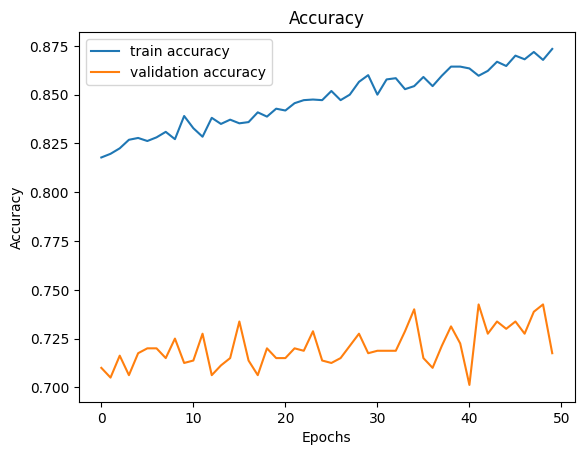

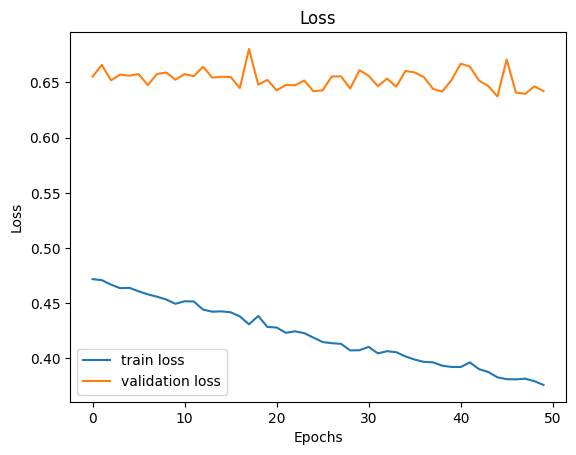

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#evaluate the model
test_loss, test_accuracy = final_model.evaluate(test_batches, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

4/4 [==============================] - 103s 31s/step - loss: 1.3818 - accuracy: 0.2750
Test Accuracy: 0.2750
Test Loss: 1.3818


4/4 [==============================] - 20s 4s/step
Confusion Matrix
[[11 17 20  2]
 [10 17 17  6]
 [11 17 19  3]
 [13 19 10  8]]
Classification Report
              precision    recall  f1-score   support

        dark       0.24      0.22      0.23        50
       light       0.24      0.34      0.28        50
    mid-dark       0.29      0.38      0.33        50
   mid-light       0.42      0.16      0.23        50

    accuracy                           0.28       200
   macro avg       0.30      0.28      0.27       200
weighted avg       0.30      0.28      0.27       200



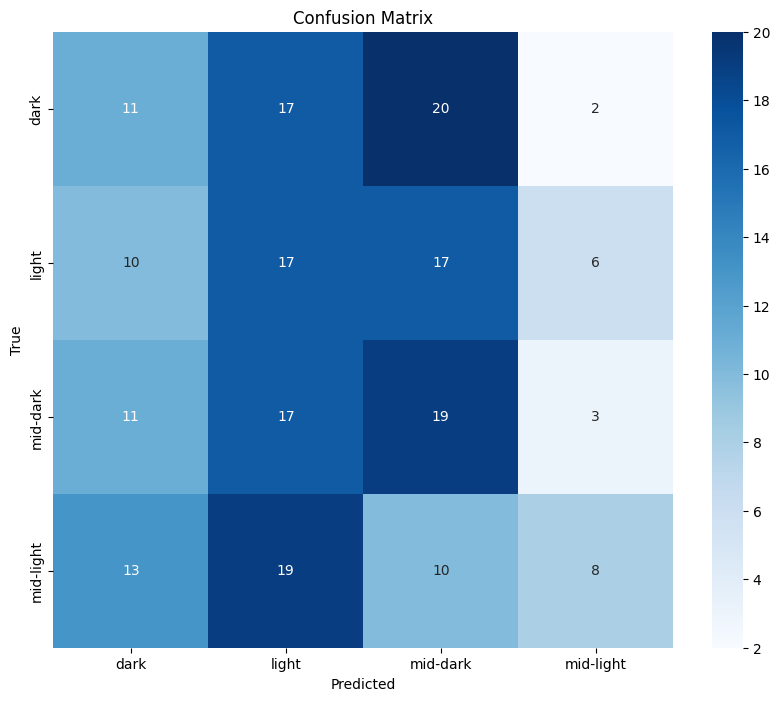

In [ ]:
# predict test data
# Get the class labels
class_labels = list(test_batches.class_indices.keys())

# Reset the test_batches generator
test_batches.reset()

# Predict on the test data
predictions = final_model.predict(test_batches, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = test_batches.classes

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print('Confusion Matrix')
print(conf_matrix)

# Classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print('Classification Report')
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# make prediction on single image
# Get the class labels
class_labels = list(test_batches.class_indices.keys())

# Reset the test_batches generator
test_batches.reset()

# Predict on the test data
predictions = final_model.predict(test_batches, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = test_batches.classes

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print('Confusion Matrix')
print(conf_matrix)

# Classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print('Classification Report')
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Datasettt/Resnett.h5')
print("Model saved.")

Model saved.
